<a href="https://www.kaggle.com/code/mustafacihadgoktepe/unsupervised-learning-on-country-data?scriptVersionId=107885760" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("../input/unsupervised-learning-on-country-data/Country-data.csv")
data_dictionary = pd.read_csv("../input/unsupervised-learning-on-country-data/data-dictionary.csv")
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [2]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
data_2 = data.drop('country', axis=1)

In [8]:
from mlxtend.preprocessing import minmax_scaling
scaled_data = minmax_scaling(data_2, columns=data_2.columns)

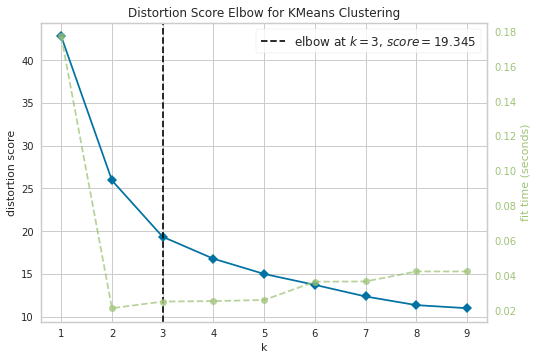

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(scaled_data)
visualize.poof()

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
data["Cluster"] = kmeans.fit_predict(scaled_data)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


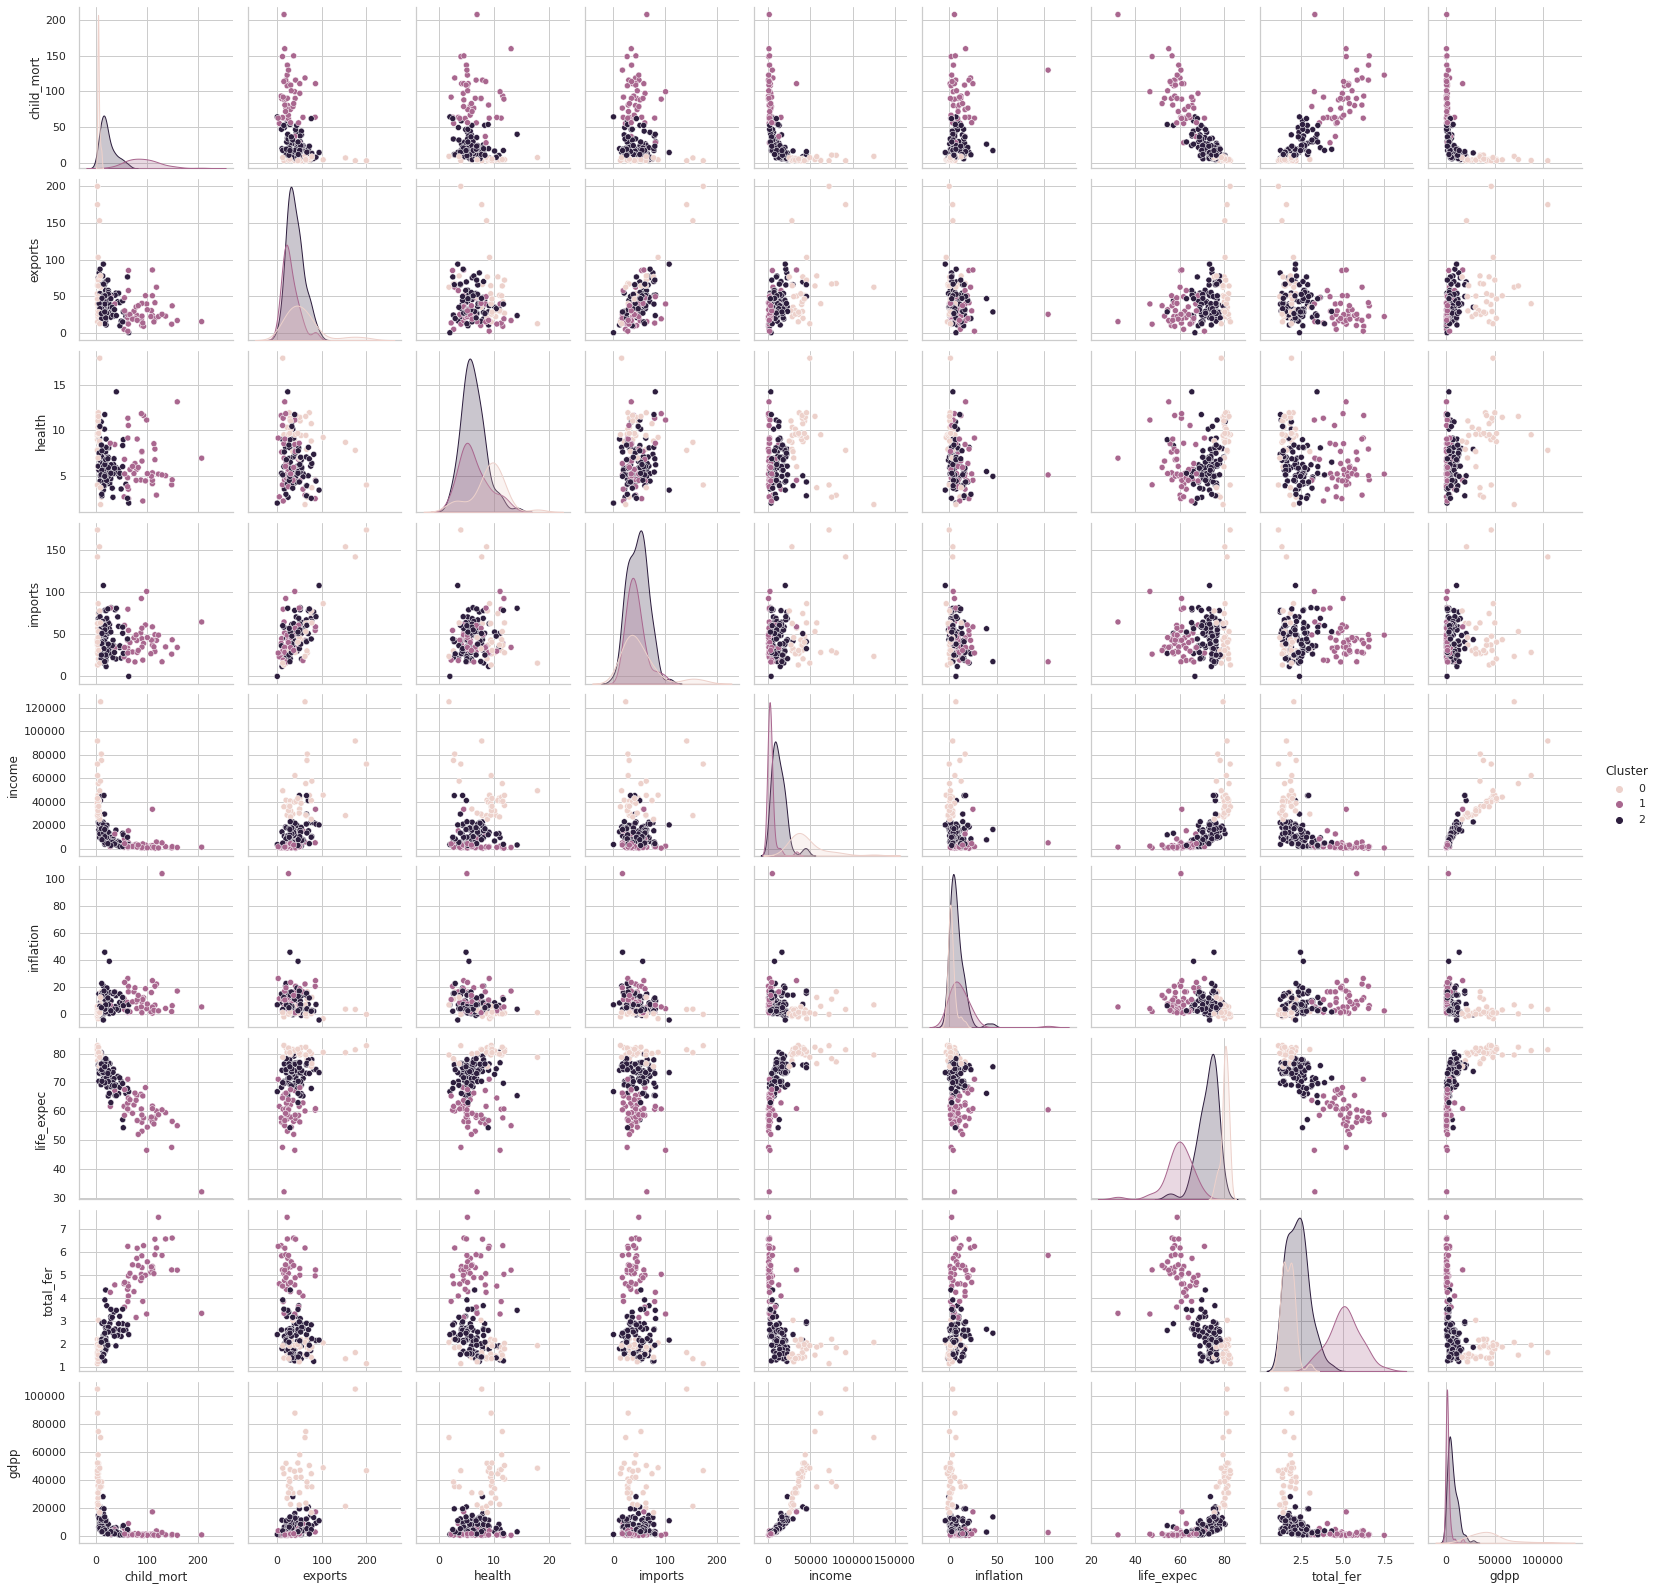

In [11]:
sns.set(style="whitegrid")

sns.pairplot(data, hue='Cluster');

In [12]:
data['Cluster'].value_counts()

2    86
1    46
0    35
Name: Cluster, dtype: int64

In [13]:
data.loc[data.Cluster == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0


In [19]:
data.loc[data.Cluster == 0].country.unique()

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand',
       'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic',
       'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

In [20]:
data.loc[data.Cluster == 1].country.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [21]:
data.loc[data.Cluster == 2].country.unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania',
       'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'South Africa', 'Sri Lanka', 'St. Vincent

In [18]:
clusters_mean = data.groupby(['Cluster']).mean()
clusters_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857
1,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
2,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698


Thanks for reading.